In [2]:
import scipy
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell
import sys
#import savReaderWriter as sav
#import the evaluatation metric
from sklearn.metrics import balanced_accuracy_score
#pandas library for reading data
import pandas as pd
#numpy library for computation with matrices and arrays
import numpy as np
#matplotlib library for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#command for displaying visualizations within the notebook
%matplotlib inline
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import seaborn as sns
%matplotlib inline

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import svm, metrics

import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
import pandas as pd
df1=pd.read_csv("cr_loan2.csv")
df2=pd.read_csv("cr_loan2.csv").dropna()
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df1.shape

(32581, 12)

In [8]:
df1.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [9]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
df1.dropna(inplace=True)
df1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
df1.shape

(28638, 12)

#### Checking for outlier Person_age column

In [12]:
max(df1['person_age'])

144

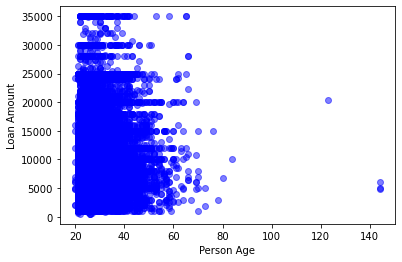

In [13]:
# Create the scatter plot for age and amount
plt.scatter(df1['person_age'], df1['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

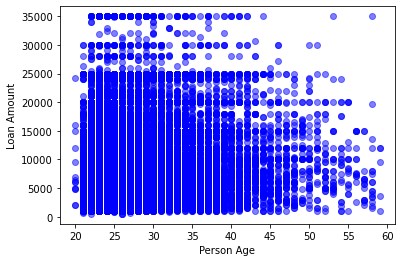

In [14]:
indices = df1[df1['person_age'] >= 60].index
df1.drop(indices, inplace=True)
plt.scatter(df1['person_age'], df1['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

#### Check outlier in Employment length columns

In [15]:
max(df1['person_emp_length'])

123.0

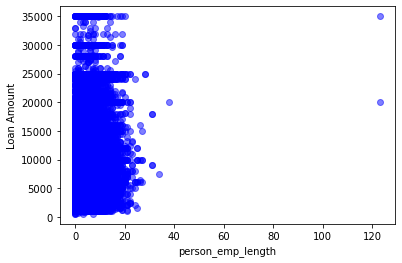

In [16]:
plt.scatter(df1['person_emp_length'], df1['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel('person_emp_length')
plt.ylabel("Loan Amount")
plt.show()

Person can't have employment length which is great than 40 because the retired age is 60 
and we suppose that person start a job at 20 years old

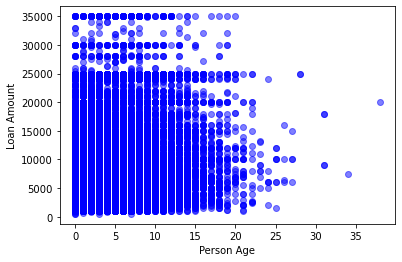

In [17]:
indices = df1[df1['person_emp_length'] >= 40].index
df1.drop(indices, inplace=True)
plt.scatter(df1['person_emp_length'], df1['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

### Cross validatation of person home ownership

In [18]:
pd.crosstab(df1['person_home_ownership'],
df1['loan_status'],values=df1['loan_int_rate'],aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.09,13.54
OTHER,11.41,13.56
OWN,10.85,12.46
RENT,10.76,13.01


### Cross validation table for loan_intent and Loan status

In [19]:
(pd.crosstab(df1['loan_intent'],df1['loan_status'],margins=True)*100/(28565)).round(2)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,11.44,4.51,15.95
EDUCATION,16.56,3.39,19.95
HOMEIMPROVEMENT,8.32,2.86,11.18
MEDICAL,13.50,4.96,18.46
PERSONAL,13.61,3.35,16.97
VENTURE,14.93,2.56,17.49
All,78.37,21.63,100.00


### Loan status percentage in the dataset 

In [20]:
(pd.crosstab(df1['loan_status'],df1['loan_status'],margins=True)*100/(28565)).round(2)

loan_status,0,1,All
loan_status,,,
0,78.37,0.00,78.37
1,0.00,21.63,21.63
All,78.37,21.63,100.00


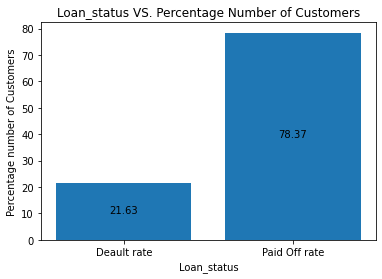

In [21]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')  
if __name__ == '__main__':
    
    x = ["Deault rate", "Paid Off rate"]     
    y = [ 21.63, 78.37]    
    #plt.figure(figsize = (3,3))  
    plt.bar(x, y) 
    addlabels(x, y) 
    plt.title('Loan_status VS. Percentage Number of Customers')  
    # giving X and Y labels
    plt.xlabel("Loan_status")
    plt.ylabel("Percentage number of Customers")
    plt.show()

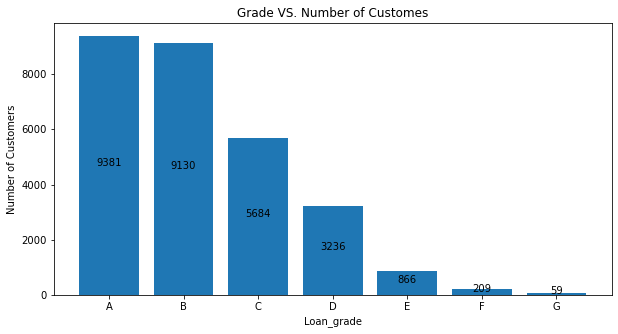

In [22]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')  
if __name__ == '__main__':
    
    x = ["A", "B", "C", "D","E", "F", "G"]     
    y = [9381,9130, 5684,3236,866,209,59]    
    plt.figure(figsize = (10,5))  
    plt.bar(x, y) 
    addlabels(x, y) 
    plt.title('Grade VS. Number of Customes')  
    # giving X and Y labels
    plt.xlabel("Loan_grade")
    plt.ylabel("Number of Customers")
    plt.show()

### Crosstable of Person_home_Ownership

In [23]:
pd.crosstab(df1['person_home_ownership'],
[df1['loan_status'],df1['loan_grade']],margins=True)

loan_status               0                                  1              \
loan_grade                A     B     C     D    E   F  G    A     B     C   
person_home_ownership                                                        
MORTGAGE               4552  3246  1712   586  167  32  0  193   282   282   
OTHER                    21    25    11     9    1   0  0    3     5     5   
OWN                     708   675   398   235   19   7  0   49    21    22   
RENT                   3198  3738  2409   492  119  24  1  657  1138   845   
All                    8479  7684  4530  1322  306  63  1  902  1446  1154   

loan_status                                  All  
loan_grade                D    E    F   G         
person_home_ownership                             
MORTGAGE                497  140   59  28  11776  
OTHER                     7    5    2   0     94  
OWN                      15   28    6   5   2188  
RENT                   1395  387   79  25  14507  
All                    1914  560  146  58  28565

### Changing data norminal and categorical data into numbers

In [24]:
df1["person_home_ownership"]=df1["person_home_ownership"].map({"RENT":0,"OWN":1,"MORTGAGE":2,"OTHER":3}).astype(int)

In [25]:
df1["loan_intent"]=df1["loan_intent"].map({"PERSONAL":0,"EDUCATION":1,"MEDICAL":2,"VENTURE":3,"HOMEIMPROVEMENT":4,"DEBTCONSOLIDATION":5}).astype(int)

In [26]:
df1["loan_grade"]=df1["loan_grade"].map({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6}).astype(int)

In [27]:
df1["cb_person_default_on_file"]=df1["cb_person_default_on_file"].map({"Y":0,"N":1}).astype(int)

In [28]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,1,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,1,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,0,4
5,21,9900,1,2.0,3,0,2500,7.14,1,0.25,1,2


In [29]:
#df1.to_csv(r'C:\Users\HP\Desktop\Bank Loan Prodiction/LOANdata.csv')
rnd_st=10   # random state number

In [32]:
df1.shape

(28565, 12)

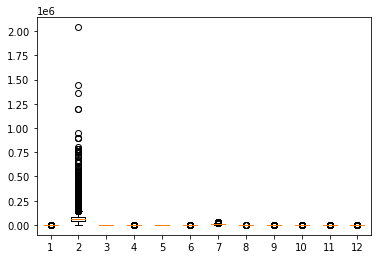

In [30]:
plt.boxplot(df1)
plt.show()

<AxesSubplot:>

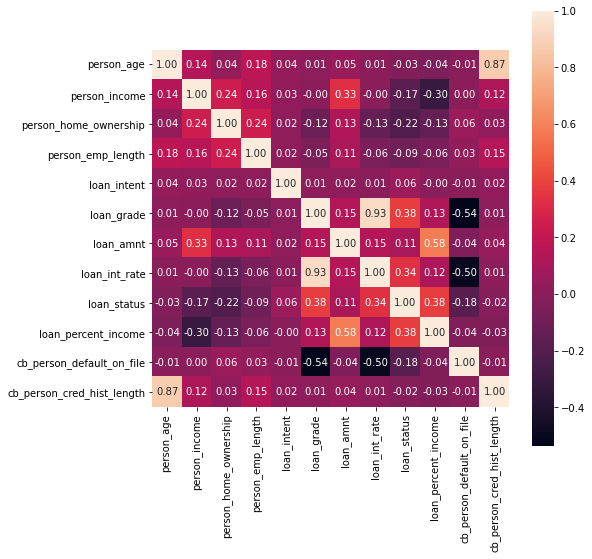

In [74]:
cor = df1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

<Figure size 720x720 with 0 Axes>

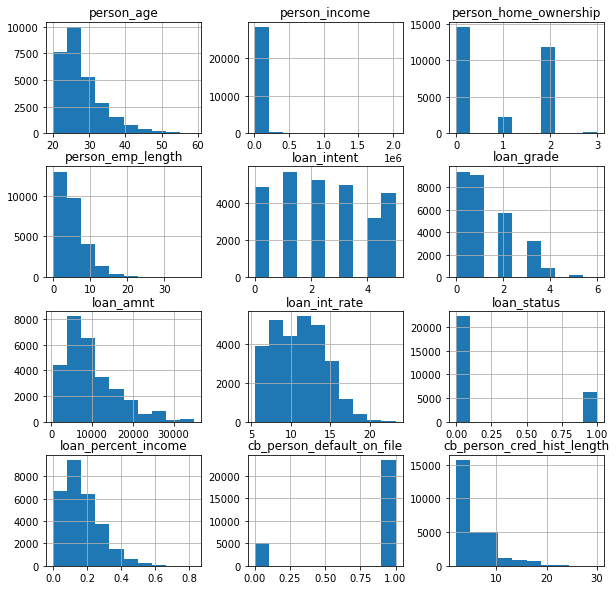

In [75]:
plt.figure(figsize=(10,10));
df1.hist(figsize=(10,10));

### Dividing the dataset into Training dataset and test dataset

In [75]:
X = df1.drop(columns=['loan_status'],axis=1)
y = df1['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [61]:

model1 = XGBClassifier()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier()


# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2,auc_score3, auc_score4)

[10:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9505990615483688 0.9294655672581258 0.8465120923923859 0.9278028095334927


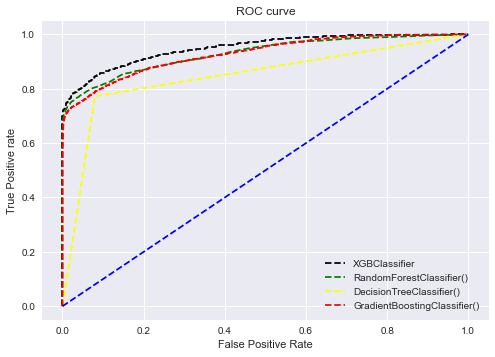

In [75]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='XGBClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier()')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='DecisionTreeClassifier()')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='GradientBoostingClassifier()')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=200)
plt.show();

In [28]:
print(X_train.shape, y_train.shape)
print(y_test.shape, X_test.shape)

(19995, 11) (19995,)
(8570,) (8570, 11)


In [29]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
# Normalize the train set
X_train = scaler.transform(X_train)
# Normalise the test set
X_test = scaler.transform(X_test)

In [30]:
print(X_train.min(),X_train.max())
print(X_test.min(),X_test.max())

-2.164168907647926 27.98709697988143
-2.164168907647926 40.20744730580059


## 1. Decisions Tree Classifier

In [31]:
# max_depths=[3,5,7,9,11,13,15]

# for depth in max_depths:
#     dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=rnd_st) # make an instance of the model
#     dt_clf.fit(X_train, y_train) # train the model on the data
#     dt_pred=dt_clf.predict(X_test) # predict the data
#     print('DecisionTreeClassifier max_depth: {0} Accuracy Score: {1:.4f}'.format(depth,accuracy_score(y_test, dt_pred)))
# print('\n')

In [74]:
dt_clf=DecisionTreeClassifier(max_depth=9, random_state=rnd_st) # make an instance of the model
dt_clf.fit(X_train, y_train) # train the model on the data
dt_pred=dt_clf.predict(X_test) # predict the data
print('Best decisionTreeClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('\n')
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))


Best decisionTreeClassifier Accuracy Score: 0.9323


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6719
           1       0.95      0.72      0.82      1851

    accuracy                           0.93      8570
   macro avg       0.94      0.86      0.89      8570
weighted avg       0.93      0.93      0.93      8570

[[6654   65]
 [ 515 1336]]


## 2. Logistic Regression

In [33]:
lr_clf=LogisticRegression(random_state=rnd_st)
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('\n')

LogisticRegression Accuracy Score: 0.8536




## 3. K Nearest Neighbors

In [34]:
max_depths=[3,5,7,9,11,13,15,17]
# for depth in max_depths:
#     knn_clf=KNeighborsClassifier(n_neighbors=depth)
#     knn_clf.fit(X_train, y_train)
#     knn_pred=knn_clf.predict(X_test)
#     print('KNeighborsClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
# print('\n')

In [35]:
knn_clf=KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(X_train, y_train)
knn_pred=knn_clf.predict(X_test)
print('KNeighborsClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

KNeighborsClassifier Accuracy Score: 0.8866


# 4. Support Vector Machine

In [36]:
sv_clf=svm.SVC(random_state=rnd_st)
sv_clf.fit(X_train, y_train)
sv_pred=sv_clf.predict(X_test)
print('Support Vector Classification Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, sv_pred)))

Support Vector Classification Accuracy Score: 0.8923


## 5. Gaussian Naive Bayes (GaussianNB)

In [37]:
G_NB_clf=GaussianNB()
G_NB_clf.fit(X_train, y_train)
G_NB_pred=sv_clf.predict(X_test)
print('Gaussian Naive Bayes Classification Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, G_NB_pred)))

Gaussian Naive Bayes Classification Accuracy Score: 0.8923


## 6. RandomForestClassifier

In [38]:
#for depth in max_depths:
#     rf_clf=RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=rnd_st)
#     rf_clf.fit(X_train, y_train)
#     rf_pred=rf_clf.predict(X_test)
#     print('RandomForestClassifier max_depth: {0} Accuracy Score: {1:.4f}'.format(depth, accuracy_score(y_test, rf_pred)))
# print(\n')

In [39]:
rf_clf=RandomForestClassifier(n_estimators=100, max_depth=15, random_state=rnd_st)
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier max_depth: {0} Accuracy Score: {1:.4f}'.format(15, accuracy_score(y_test, rf_pred)))
print('\n')

RandomForestClassifier max_depth: 15 Accuracy Score: 0.9335




## 7. Ensenble Learning (VotingClassifier Test)

In [40]:
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
vo_clf.fit(X_train, y_train)
vo_pred=vo_clf.predict(X_test)
print('VotingClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, vo_pred)))
print('\n')

VotingClassifier Accuracy Score: 0.8821




## 8. Ensenble Learning (GradientBoostingClassifier Test)

In [41]:
gb_clf=GradientBoostingClassifier(random_state=rnd_st)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
print('GradientBoostingClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, gb_pred)))
print('\n')

GradientBoostingClassifier Accuracy Score: 0.9307




## 9. Ensenble Learning (AdaBoostClassifier Test)

In [42]:
ada_clf=AdaBoostClassifier(n_estimators=400)
ada_clf.fit(X_train, y_train)
ada_pred=ada_clf.predict(X_test)
print('AdaBoostClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('\n')

AdaBoostClassifier Accuracy Score: 0.8911




## 9. XGBoost Test

In [43]:
xgb_clf=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=rnd_st)
xgb_clf.fit(X_train, y_train)
xgb_pred=xgb_clf.predict(X_test)
print('XGBoost Classifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))
print('\n')

[10:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier Accuracy Score: 0.9347




### List of different classifiers we are going to test

In [44]:
# list of different classifiers we are going to test
from sklearn.svm import SVC
from sklearn import preprocessing, metrics
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=9, random_state=rnd_st),
'Support Vector Machine': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'VotingClassifier':VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft'),
'GradientBoostingClassifier':GradientBoostingClassifier(),
'AdaBoostClassifier':AdaBoostClassifier(n_estimators=400),
'XGBClassifier':XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=rnd_st)
}

In [45]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': metrics.recall_score(y_test, y_pred,average='macro'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='macro'),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

[10:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.805812,0.724991,0.752949,0.853559
1,GaussianNB,0.724592,0.756572,0.737349,0.808868
2,RandomForest,0.948335,0.854323,0.891078,0.933606
3,DecisionTreeClassifier,0.940884,0.856049,0.889943,0.932322
4,Support Vector Machine,0.883067,0.782576,0.818487,0.892299
5,KNeighborsClassifier,0.854037,0.779633,0.808144,0.883081
6,VotingClassifier,0.865949,0.764751,0.799918,0.882147
7,GradientBoostingClassifier,0.944150,0.849136,0.886046,0.930688
8,AdaBoostClassifier,0.854922,0.808644,0.828424,0.891132
9,XGBClassifier,0.945961,0.858907,0.893587,0.934656
